In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df=pd.read_csv('Housing.csv')

In [47]:
df.head(12)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_zscore
0,4340000.0,7420,4,2,3,1,0,0,0,1,2,1,1.0,0.184126
1,4340000.0,8960,4,4,4,1,0,0,0,1,3,0,1.0,0.184126
2,4340000.0,9960,3,2,2,1,0,1,0,0,2,1,0.5,0.184126
3,4340000.0,7500,4,2,2,1,0,1,0,1,3,1,1.0,0.184126
4,4340000.0,7420,4,1,2,1,1,1,0,1,2,0,1.0,0.184126
5,4340000.0,7500,3,3,1,1,0,1,0,1,2,1,0.5,0.184126
6,4340000.0,8580,4,3,4,1,0,0,0,1,2,1,0.5,0.184126
7,4340000.0,16200,5,3,2,1,0,0,0,0,0,0,0.0,0.184126
8,4340000.0,8100,4,1,2,1,1,1,0,1,2,1,1.0,0.184126
9,4340000.0,5750,3,2,4,1,1,0,0,1,1,1,0.0,0.184126


In [20]:
df.value_counts()

price     area   bedrooms  bathrooms  stories  mainroad  guestroom  basement  hotwaterheating  airconditioning  parking  prefarea  furnishingstatus
1750000   2910   3         1          1        no        no         no        no               no               0        no        furnished           1
5229000   7085   3         1          1        yes       yes        yes       no               no               2        yes       semi-furnished      1
5110000   11410  2         1          2        yes       no         no        no               no               0        yes       furnished           1
5145000   3410   3         1          2        no        no         no        no               yes              0        no        semi-furnished      1
          7980   3         1          1        yes       no         no        no               no               1        yes       semi-furnished      1
                                                                                                                                                      ..
3675000   3630   2         1          1        yes       no         no        no               yes              0        no        unfurnished         1
          3600   2         1          1        yes       no         no        no               no               0        no        furnished           1
3640000   5960   3         1          2        yes       yes        yes       no               no               0        no        unfurnished         1
          4280   2         1          1        yes       no         no        no               yes              2        no        semi-furnished      1
13300000  7420   4         2          3        yes       no         no        no               yes              2        yes       furnished           1
Name: count, Length: 545, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [26]:
mapping = {'no': 0, 'yes': 1}
df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']]=df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace(mapping)

<ipython-input-26-ebe7dbe6ec99>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']]=df[['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']].replace(mapping)


In [32]:
df['furnishingstatus']=df['furnishingstatus'].replace(['unfurnished','furnished','semi-furnished'],[0,1,0.5])

<ipython-input-32-1413580952da>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus']=df['furnishingstatus'].replace(['unfurnished','furnished','semi-furnished'],[0,1,0.5])


In [33]:
df.sample(12)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
429,3325000,4775,4,1,2,1,0,0,0,0,0,0,0.0
15,9100000,6000,4,1,2,1,0,1,0,0,2,0,0.5
107,6125000,6420,3,1,3,1,0,1,0,0,0,1,0.0
522,2380000,2475,3,1,2,1,0,0,0,0,0,0,1.0
346,3850000,2176,2,1,2,1,1,0,0,0,0,1,0.5
162,5460000,6600,4,2,2,1,1,1,0,0,0,1,0.5
425,3360000,3185,2,1,1,1,0,1,0,0,2,0,1.0
100,6230000,6600,3,2,1,1,0,1,0,1,0,1,0.0
266,4403000,4880,3,1,1,1,0,0,0,0,2,1,0.0
438,3255000,4500,2,1,1,0,0,0,0,0,0,0,0.5


{'whiskers': [<matplotlib.lines.Line2D at 0x79f364d62410>,
 'caps': [<matplotlib.lines.Line2D at 0x79f364d60700>,
 'boxes': [<matplotlib.lines.Line2D at 0x79f364d62b60>],
 'medians': [<matplotlib.lines.Line2D at 0x79f364d604f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79f364d638e0>],
 'means': []}

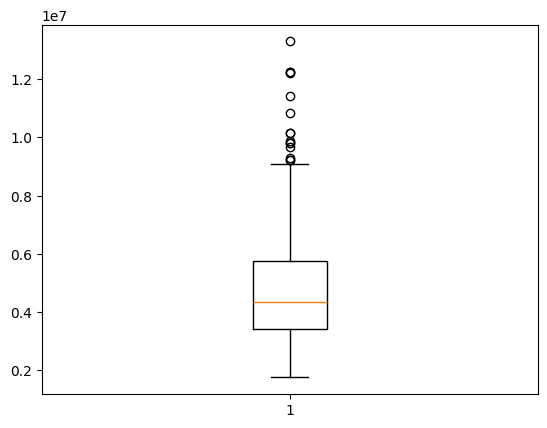

In [37]:
plt.boxplot(df['price'])

In [48]:
from scipy.stats import zscore
df['price_zscore'] = zscore(df['price'])
outliers = df[(df['price_zscore'] > 3) | (df['price_zscore'] < -3)]


In [49]:
outliers


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price_zscore
527,2275000.0,1836,2,1,1,0,0,1,0,0,0,0,0.5,-4.754989
528,2275000.0,3970,1,1,1,0,0,0,0,0,0,0,0.0,-4.754989
529,2275000.0,3970,3,1,2,1,0,1,0,0,0,0,0.0,-4.754989
530,2240000.0,1950,3,1,1,0,0,0,1,0,0,0,0.0,-4.838703
531,2233000.0,5300,3,1,1,0,0,0,0,1,0,1,0.0,-4.855446
532,2135000.0,3000,2,1,1,0,0,0,0,0,0,0,0.0,-5.089844
533,2100000.0,2400,3,1,2,1,0,0,0,0,0,0,0.0,-5.173558
534,2100000.0,3000,4,1,2,1,0,0,0,0,0,0,0.0,-5.173558
535,2100000.0,3360,2,1,1,1,0,0,0,0,1,0,0.0,-5.173558
536,1960000.0,3420,5,1,2,0,0,0,0,0,0,0,0.0,-5.508413


In [60]:
x=df.drop(columns=['price'])
y=df['price']

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [71]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2,random_state=42)

In [72]:
clr=LogisticRegression()

In [73]:
clr.fit(x_tr,y_tr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [69]:
y_pred=clr.predict(x_ts)

In [76]:
acc=accuracy_score(y_ts,y_pred)
acc

0.944954128440367